### Exploratory Data Analysis (EDA) for Animal Classification Dataset

In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import Counter

### Loading Dataset Information
Define the dataset path and list all available classes.
Count the number of images for each class.

In [3]:
# Define dataset path
dataset_path = "data/raw-img"

In [9]:
# List all class folders
classes = os.listdir(dataset_path)
num_classes = len(classes)
num_classes

10

In [ ]:
# Count images per class
image_counts = {cls: len(os.listdir(os.path.join(dataset_path, cls))) for cls in classes}

In [12]:
# Print dataset summary
print(f"Total Classes: {num_classes}")
for cls, count in image_counts.items():
    print(f"{cls}: {count} images")

Total Classes: 10
dog: 4863 images
squirrel: 1862 images
spider: 4821 images
butterfly: 2112 images
sheep: 1820 images
elephant: 1446 images
chicken: 3098 images
cat: 1668 images
cow: 1866 images
horse: 2623 images


### Checking Class Distribution
Plot a bar chart showing the number of images per class.
Identify any class imbalance that could affect model training.

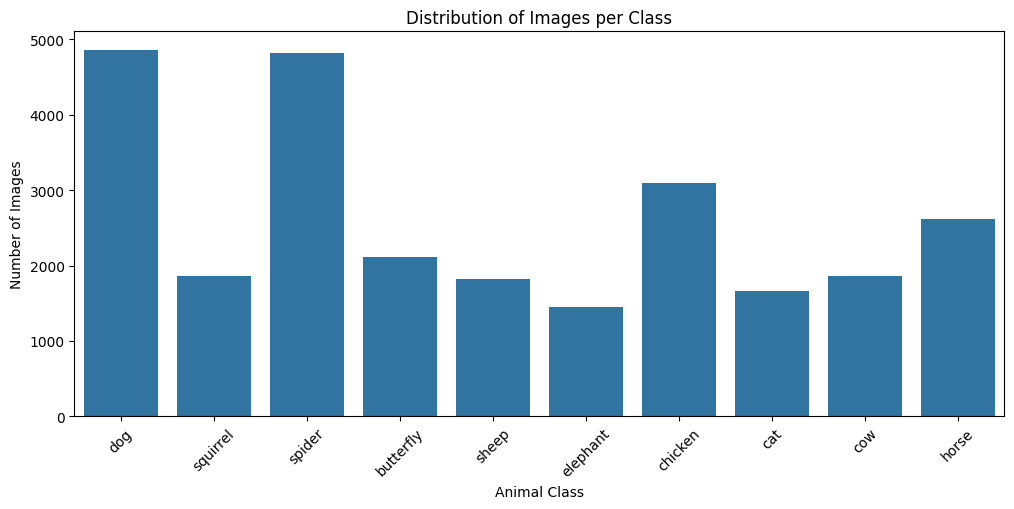

In [6]:
# Plot distribution of images per class
plt.figure(figsize=(12, 5))
sns.barplot(x=list(image_counts.keys()), y=list(image_counts.values()))
plt.xticks(rotation=45)
plt.xlabel("Animal Class")
plt.ylabel("Number of Images")
plt.title("Distribution of Images per Class")
plt.show()

Based on the output, we can observe that the class distribution is not balanced, as the number of samples in each class varies widely. The smallest class, "elephant", has only 1446 samples, while the largest class, "dog", has 4863 samples.

This imbalance could potentially affect the performance of a deep learning model trained on this dataset, as the model may be biased towards the majority class and have lower accuracy on the minority classes. Therefore, it may be necessary to use techniques such as data augmentation or class weighting to balance the dataset and improve the performance of the model.

### Visualizing Sample Images
Display a few sample images from different classes.
Check the variety in image quality and structure.

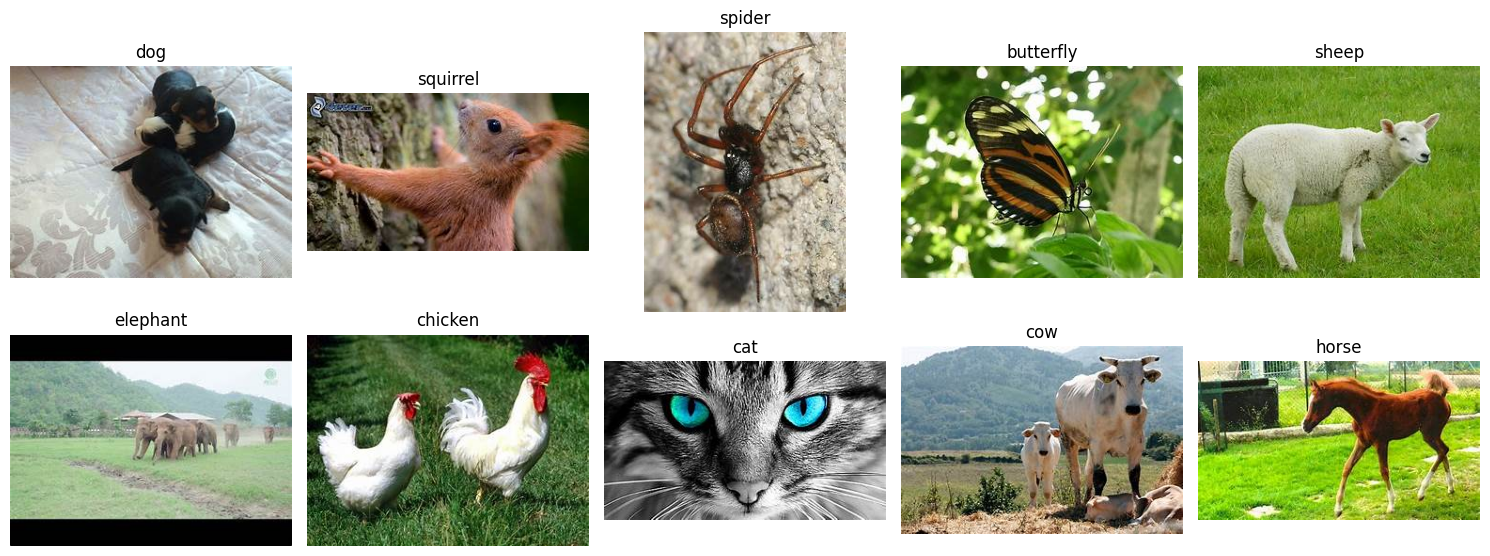

In [7]:
# Visualizing sample images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for ax, cls in zip(axes.flat, classes[:10]):
    class_path = os.path.join(dataset_path, cls)
    image_name = os.listdir(class_path)[0]  # Take first image
    img = Image.open(os.path.join(class_path, image_name))
    ax.imshow(img)
    ax.set_title(cls)
    ax.axis("off")

plt.tight_layout()
plt.show()

### Analyzing Image Properties
Extract image dimensions to check for inconsistencies.

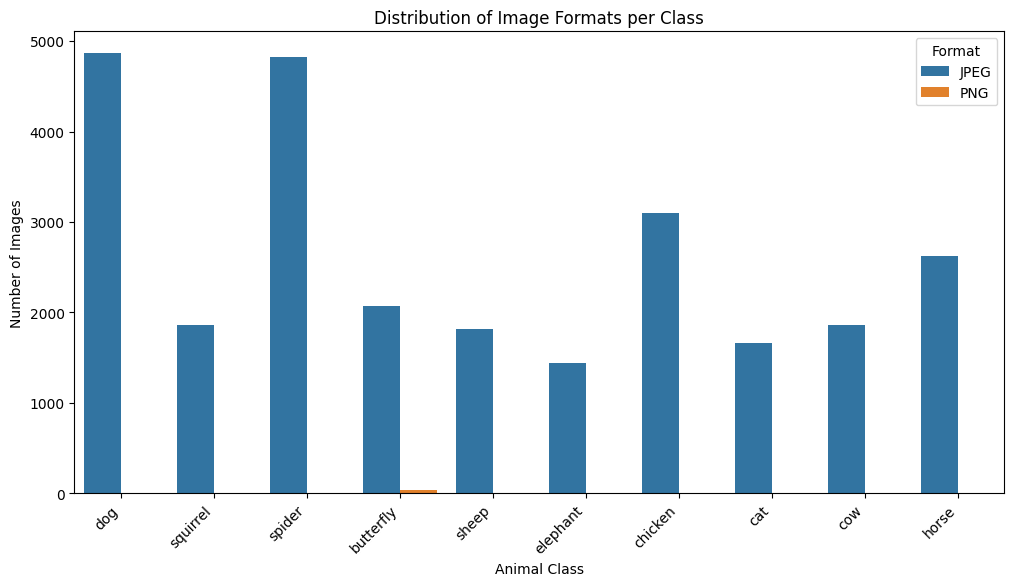

In [18]:
import pandas as pd

# Collect image format information per class
image_formats_per_class = {cls: [] for cls in classes}
image_sizes_per_class = {cls: [] for cls in classes}

for cls in classes:
    class_path = os.path.join(dataset_path, cls)
    for image_name in os.listdir(class_path):
        img = Image.open(os.path.join(class_path, image_name))
        image_formats_per_class[cls].append(img.format)
        image_sizes_per_class[cls].append(img.size)

# Convert format data to a DataFrame for visualization
format_df = pd.DataFrame(
    [(cls, fmt) for cls, formats in image_formats_per_class.items() for fmt in formats],
    columns=["Class", "Format"]
)

# Plot image format distribution per class
plt.figure(figsize=(12, 6))
sns.countplot(data=format_df, x="Class", hue="Format")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Animal Class")
plt.ylabel("Number of Images")
plt.title("Distribution of Image Formats per Class")
plt.legend(title="Format")
plt.show()

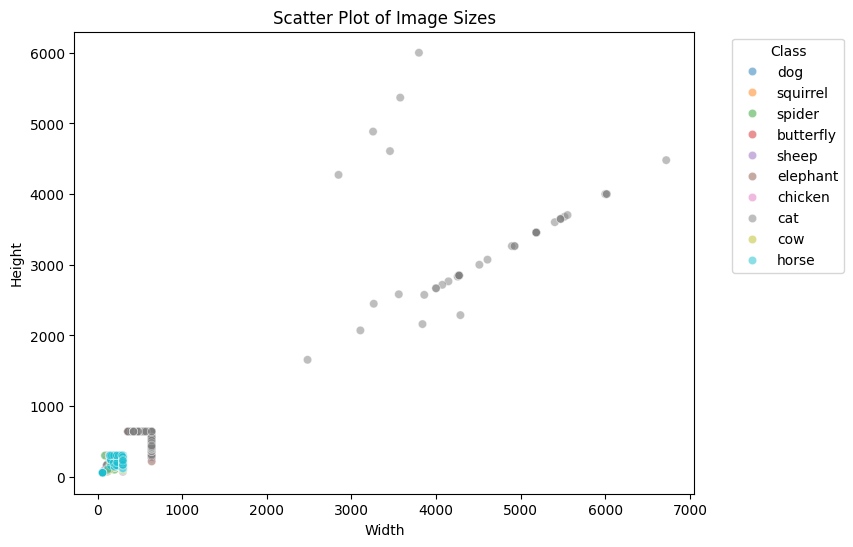

In [21]:
# Extract image width and height separately
image_dimensions = []
for cls in classes:
    class_path = os.path.join(dataset_path, cls)
    for image_name in os.listdir(class_path):
        img = Image.open(os.path.join(class_path, image_name))
        image_dimensions.append((cls, img.size[0], img.size[1]))  # (class, width, height)

# Convert to DataFrame
df_sizes = pd.DataFrame(image_dimensions, columns=["Class", "Width", "Height"])

# Scatter plot of width vs height
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_sizes, x="Width", y="Height", hue="Class", alpha=0.5)
plt.title("Scatter Plot of Image Sizes")
plt.xlabel("Width")
plt.ylabel("Height")
plt.legend(title="Class", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

The dataset contains images with a wide range of resolutions, from small to very large sizes (e.g., over 6000 pixels in height).  
Some images have extreme dimensions (e.g., very large images with width and height > 4000 pixels).
These outliers may lead to inefficient memory usage and slower training.
Solution: Consider removing or downsampling such images.
Resizing all images to a lower resolution (e.g., 224x224 for CNNs) might be beneficial.

In [23]:
from collections import Counter

# Check if images are RGB or grayscale
color_modes = []
for cls in classes:
    class_path = os.path.join(dataset_path, cls)
    for image_name in os.listdir(class_path):
        img = Image.open(os.path.join(class_path, image_name))
        color_modes.append(img.mode)

# Count occurrences of each color mode
color_mode_counts = Counter(color_modes)

# Print unique color modes and their counts
print("Color mode distribution:")
for mode, count in color_mode_counts.items():
    print(f"{mode}: {count} images")


Color mode distribution:
RGB: 26128 images
RGBA: 49 images
L: 1 images
CMYK: 1 images


Majority of images are in RGB format (26,128 images) – This is expected and ideal for training as most deep learning models are designed to handle RGB images.  
A small number of images (49) are in RGBA format – These images contain an additional alpha channel (transparency). This may require conversion to standard RGB.  
One image is in grayscale (L mode) – This image has only one channel instead of three, which could cause inconsistencies during training if not preprocessed.  
One image is in CMYK format – we will сonvert to RGB to maintain consistency.